In [55]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [57]:
df = pd.read_csv('strikes_data1.csv') 
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [58]:
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [59]:
df.shape

(3401012, 3)

In [60]:
df.drop_duplicates().shape

(3401012, 3)

In [61]:
df.sort_values(by="number_of_strikes", ascending = False).head()

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)


In [62]:
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name="counts").style.background_gradient()

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


In [63]:
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name().str[:3]
df.head

<bound method NDFrame.head of               date  number_of_strikes  center_point_geom  week weekday
0       2018-01-03                194      POINT(-75 27)     1     Wed
1       2018-01-03                 41    POINT(-78.4 29)     1     Wed
2       2018-01-03                 33    POINT(-73.9 27)     1     Wed
3       2018-01-03                 38    POINT(-73.8 27)     1     Wed
4       2018-01-03                 92      POINT(-79 28)     1     Wed
...            ...                ...                ...   ...     ...
3401007 2018-12-28                 30  POINT(-90.6 28.7)    52     Fri
3401008 2018-12-28                 30  POINT(-89.4 30.9)    52     Fri
3401009 2018-12-28                 30  POINT(-89.5 31.4)    52     Fri
3401010 2018-12-28                 30  POINT(-88.3 31.6)    52     Fri
3401011 2018-12-28                 30  POINT(-88.4 32.1)    52     Fri

[3401012 rows x 5 columns]>

In [64]:
df[['weekday', 'number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Fri,13.349972
Mon,13.152804
Sat,12.732694
Sun,12.324717
Thu,13.240594
Tue,13.813599
Wed,13.224568


In [65]:
weekday_order = ['Mon','Tue', 'Wed', 'Thu','Fri','Sat','Sun']
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wed
1,2018-01-03,41,POINT(-78.4 29),1,Wed
2,2018-01-03,33,POINT(-73.9 27),1,Wed
3,2018-01-03,38,POINT(-73.8 27),1,Wed
4,2018-01-03,92,POINT(-79 28),1,Wed


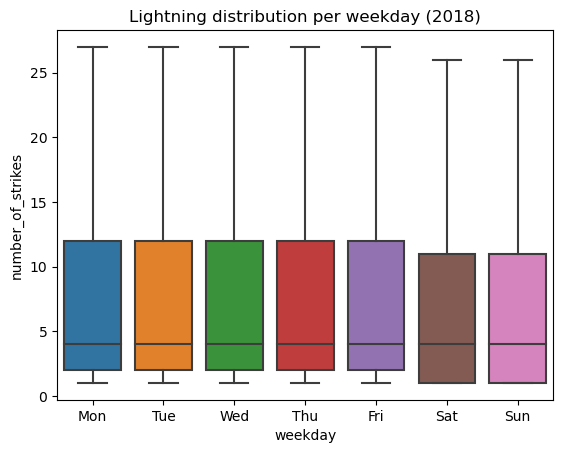

In [66]:
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');

In [68]:
df2 = pd.read_csv('strikes_data2.csv')

In [69]:
union_df = pd.concat([df.drop(['weekday', 'week'], axis = 1), df2], ignore_index = True )

In [70]:
print(df.shape)
print(df2.shape)
print(union_df.shape)
print(df.shape[0] + df2.shape[0] == union_df.shape[0])

(3401012, 5)
(7077991, 3)
(10479003, 3)
True


In [71]:
union_df['date'] = pd.to_datetime(union_df['date'])

In [72]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 239.8+ MB


In [73]:
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


In [74]:
union_df[['year', 'number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


In [75]:
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


In [76]:
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


In [77]:
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,August,2016,7250442,41582229
2,December,2016,316450,41582229
3,February,2016,312676,41582229
4,January,2016,313595,41582229


In [78]:
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head(12)

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,August,2016,7250442,41582229,17.436396
2,December,2016,316450,41582229,0.761022
3,February,2016,312676,41582229,0.751946
4,January,2016,313595,41582229,0.754156
5,July,2016,10661475,41582229,25.639499
6,June,2016,6647930,41582229,15.987431
7,March,2016,2057527,41582229,4.948092
8,May,2016,5800500,41582229,13.949469
9,November,2016,367853,41582229,0.884640


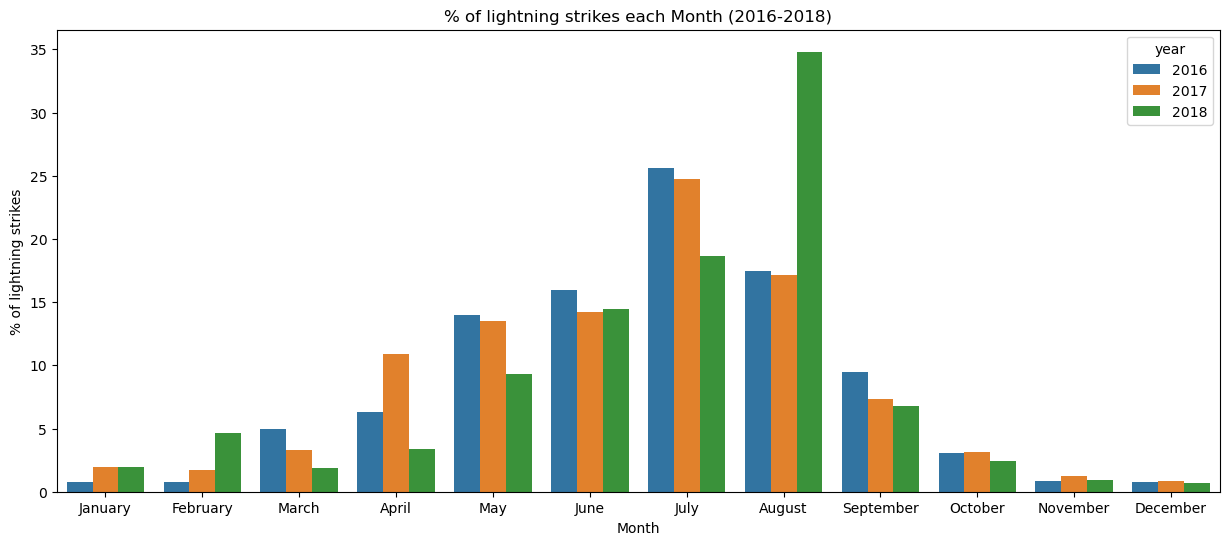

In [79]:
plt.figure(figsize=(15,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");